# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
'''
Data Dictionary:

Pregnancies: Number of times pregnant.
Glucose: Plasma glucose concentration.
BloodPressure: blood pressure (mm Hg).
SkinThickness: Triceps skin fold thickness (mm).
Insulin: 2-Hour serum insulin (mu U/ml).
BMI: Body mass index (weight in kg/(height in m)^2).
DiabetesPedigreeFunction: Diabetes pedigree function.
Age: (years).
Outcome: Class variable (0 or 1), Class Distribution: (class value 1 is interpreted as "tested positive for diabetes")
'''

In [3]:
# Importing the CSV here
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df_raw.to_csv('../data/raw/diabetes_raw.csv')

In [7]:
print(f'The Dataset has {df_raw.shape[0]} "observations" with {df_raw.shape[1]} columns')

The Dataset has 768 "observations" with 9 columns


In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are no NULLS

In [9]:
df_raw.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [10]:
df_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Check: Pregnancies=17, Glucose,BloodPressure,SkinThickness,Insulin,BMI=0

### FEATURES ANALISYS

All features are numerical.

In [11]:
df_len = len(df_raw)

In [32]:
def numerical(df, feature) :
    print(f'='*30)
    print(f'{feature.upper()} ANALISYS')
    print(f'='*30)

    nuniques = df[feature].nunique()
    counts = df[feature].value_counts()
    print(f'There are {nuniques} different values in {feature}')
    print(f'{counts}')

In [33]:
def graphs(df, feature, bins) :
    # hist:
    if bins == 0 :
        df.hist(feature, grid=True, figsize=(6,6), bins=df[feature].nunique())
    else :
        df.hist(feature, grid=True, figsize=(6,6), bins=bins)
    plt.show()
    
    # boxplot:
    sns.catplot(y=feature, kind='box', data=df)
    plt.show()

PREGNANCIES ANALISYS
There are 17 different values in Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64


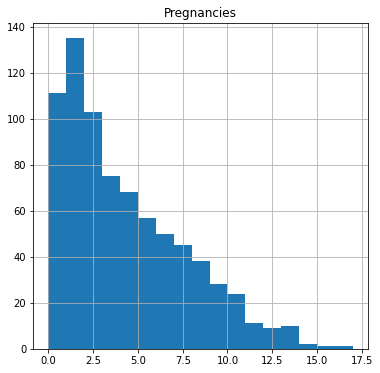

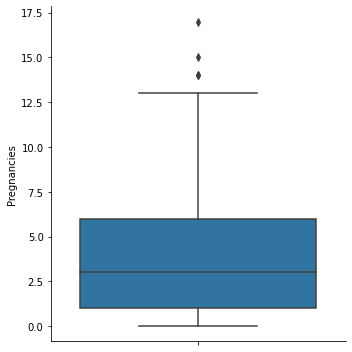

GLUCOSE ANALISYS
There are 136 different values in Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64


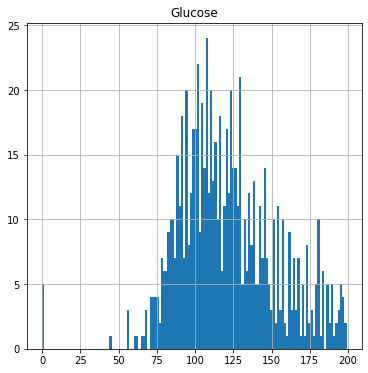

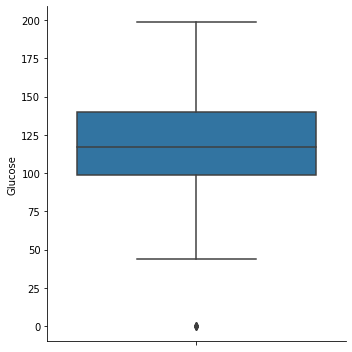

BLOODPRESSURE ANALISYS
There are 47 different values in BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64


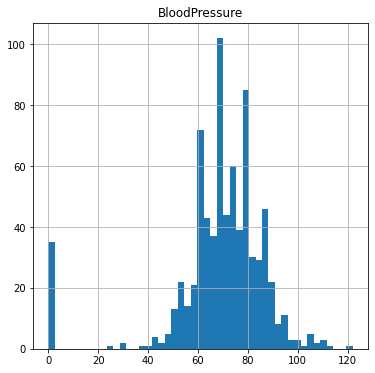

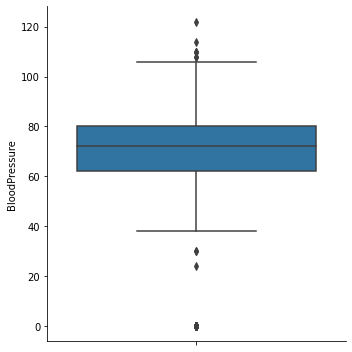

SKINTHICKNESS ANALISYS
There are 51 different values in SkinThickness
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: SkinThickness, dtype: int64


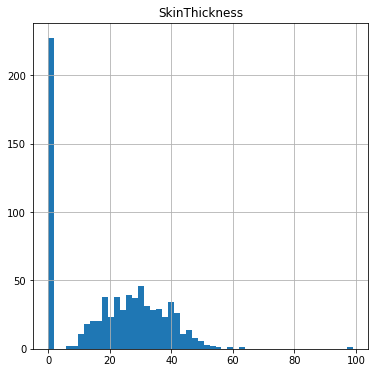

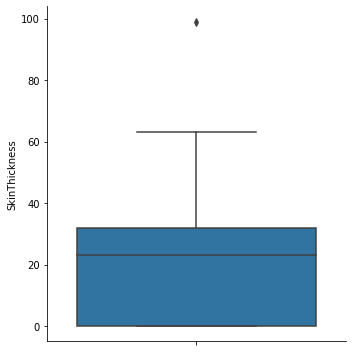

INSULIN ANALISYS
There are 186 different values in Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64


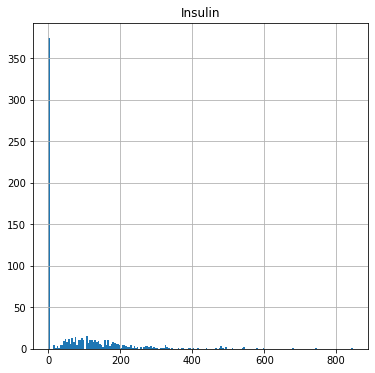

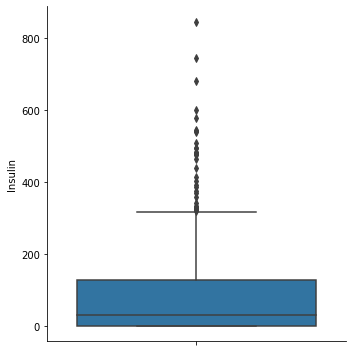

BMI ANALISYS
There are 248 different values in BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 248, dtype: int64


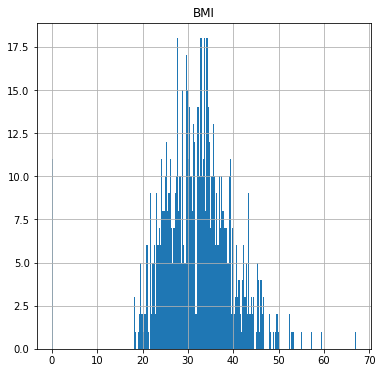

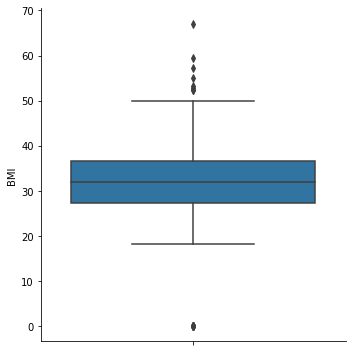

DIABETESPEDIGREEFUNCTION ANALISYS
There are 517 different values in DiabetesPedigreeFunction
0.258    6
0.254    6
0.268    5
0.207    5
0.261    5
        ..
1.353    1
0.655    1
0.092    1
0.926    1
0.171    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64


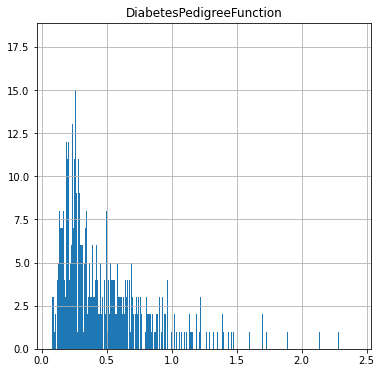

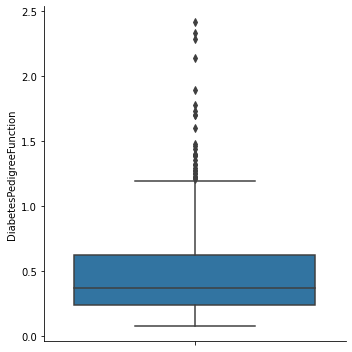

AGE ANALISYS
There are 52 different values in Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64


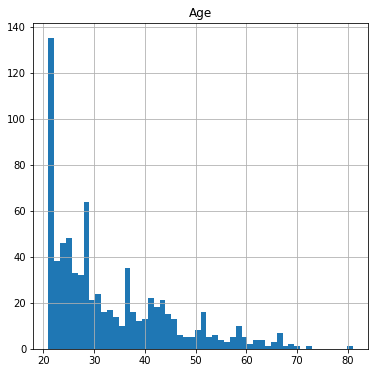

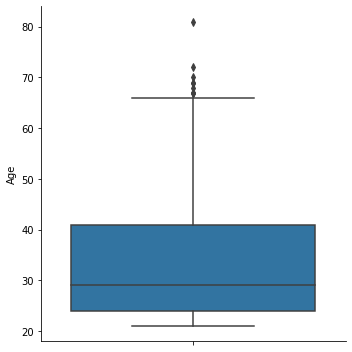

OUTCOME ANALISYS
There are 2 different values in Outcome
0    500
1    268
Name: Outcome, dtype: int64


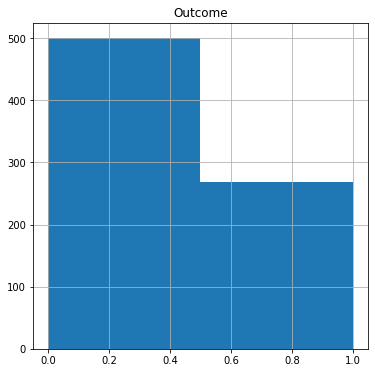

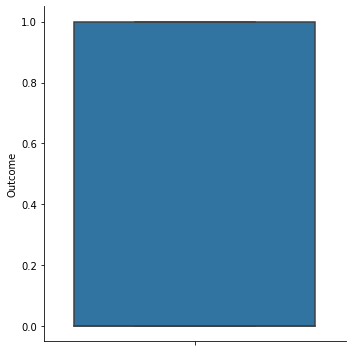

In [34]:
for feature in df_raw.columns :
    numerical(df_raw, feature)
    graphs(df_raw, feature, bins=0)

Conclusions

Pregnancies: remove > 12

Glucose: replace 0 -> median, group 10 [30_200]

BlodPressure: replace 0-> median, remove > 100, group 10 [20_100]

SkinThickness: replace 0 -> median, remove > 60, group 5 [0_60]

Insulin: remove > 300 ?, group 10 [0_300] 

BMI: replace 0 -> median, remoove > 50, grouṕ 5 [15_50]

DiabetesPedigree: remove > 1.2, group 0.100 [0_1.200]

Age: remove > 70, group 10 [20_70]

In [71]:
#df_raw.to_csv('../data/raw/diabetes_raw.csv')
df_interim = df_raw.copy()

In [72]:
def remove_outliers(df, feature, max) :
    return df.drop(df[df[feature] > max].index)

In [73]:
df_interim = remove_outliers(df_interim, 'Pregnancies', max=12)
df_interim = remove_outliers(df_interim, 'BloodPressure', max=100)
df_interim = remove_outliers(df_interim, 'SkinThickness', max=60)
#df_interim = remove_outliers(df_interim, 'Insulin', max=300)
df_interim = remove_outliers(df_interim, 'BMI', max=50)
#df_interim = remove_outliers(df_interim, 'DiabetesPedigreeFunction', max=1.2)
df_interim = remove_outliers(df_interim, 'Age', max=70)


In [75]:
def replace_value_median(df, feature, value) :
    return df[feature].replace(value, df[feature].median())

In [76]:
df_interim = replace_value_median(df_interim, 'Glucose', 0)

In [77]:
feature = 'Glucose'
numerical(df_interim, feature)
graphs(df_interim, feature, bins=0)

GLUCOSE ANALISYS


KeyError: 'Glucose'

In [78]:
for feature in df_interim.columns :
    numerical(df_interim, feature)
    graphs(df_interim, feature, bins=0)

AttributeError: 'Series' object has no attribute 'columns'